In [1]:
import copy
import random

from IPython.core.display import display, HTML
from nbmetalog import nbmetalog as nbm
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import pylib

random.seed(1)


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az575-767
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: 00-naive-surface
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/00-naive-surface.ipynb
revision: null
session: 07a614e0-1bb8-4510-8c96-79bc7bc8d304
timestamp: 2024-04-23T16:43:05Z00:00


IPython==7.31.1
keyname==0.5.2
yaml==6.0
nbmetalog==0.2.6
pandas==1.5.2
seaborn==0.13.2
re==2.2.1
comm==0.1.3
logging==0.5.1.2
psutil==5.9.5
zmq==25.1.0
json==2.0.9
ipykernel==6.23.3


In [3]:
def get_deposition_site_at_rank(rank: int) -> int:
    return pylib.hanoi.get_hanoi_value_at_index(rank)


In [4]:
def get_deposition_rank_at_site(site: int, num_site_depositions: int) -> int:
    if num_site_depositions == 0:
        return 0

    num_incidences = pylib.hanoi.get_incidence_count_of_hanoi_value_through_index(
        site,
        num_site_depositions - 1,
    )
    if num_incidences == 0:
        return 0

    return pylib.hanoi.get_index_of_hanoi_value_nth_incidence(site, num_incidences - 1)


In [5]:
surface_size = 64
num_generations = 1000

surface_timestamps = [0] * surface_size
surface_values = [random.choice([0, 1]) for __ in range(surface_size)]


In [6]:
surface_timestamps_records = []
for generation in range(num_generations):
    target_site = get_deposition_site_at_rank(generation)
    surface_values[target_site] = random.choice([0, 1])
    surface_timestamps[target_site] = generation

    assert [
        get_deposition_rank_at_site(site, generation + 1)
        for site in range(surface_size)
    ] == surface_timestamps

    for site, timestamp in enumerate(surface_timestamps):
        surface_timestamps_records.append(
            {
                "generation": generation,
                "site": site,
                "timestamp": timestamp,
            }
        )


In [7]:
surface_timestamps_df = pd.DataFrame.from_records(surface_timestamps_records)
surface_timestamps_df


,generation,site,timestamp
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
63995,999,59,0
63996,999,60,0
63997,999,61,0
63998,999,62,0


teeplots/00/hue=site+viz=scatterplot+x=generation+y=timestamp+ext=.pdf
teeplots/00/hue=site+viz=scatterplot+x=generation+y=timestamp+ext=.png


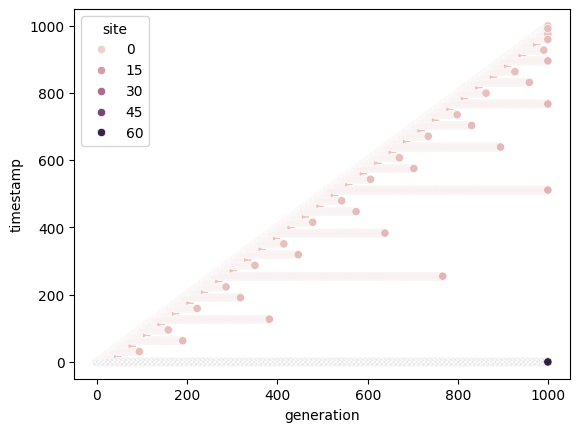

<Axes: xlabel='generation', ylabel='timestamp'>

In [8]:
pylib.tee_release(
    sns.scatterplot,
    data=surface_timestamps_df,
    x="generation",
    y="timestamp",
    hue="site",
    teeplot_subdir="00",
)


teeplots/00/hue=timestamp+viz=scatterplot+x=generation+y=site+ext=.pdf
teeplots/00/hue=timestamp+viz=scatterplot+x=generation+y=site+ext=.png


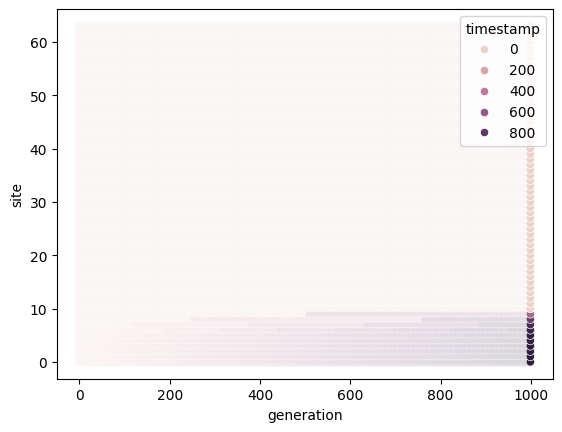

<Axes: xlabel='generation', ylabel='site'>

In [9]:
pylib.tee_release(
    sns.scatterplot,
    data=surface_timestamps_df,
    x="generation",
    y="site",
    hue="timestamp",
    teeplot_subdir="00",
)


# Visualize


In [10]:
def get_surface_rank_capacity(surface_size: int) -> int:
    return pylib.hanoi.get_index_of_hanoi_value_nth_incidence(surface_size, 0)


100%|██████████| 127/127 [00:00<00:00, 120706.23it/s]


teeplots/00/num-generations=127+surface-size=8+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/num-generations=127+surface-size=8+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.png


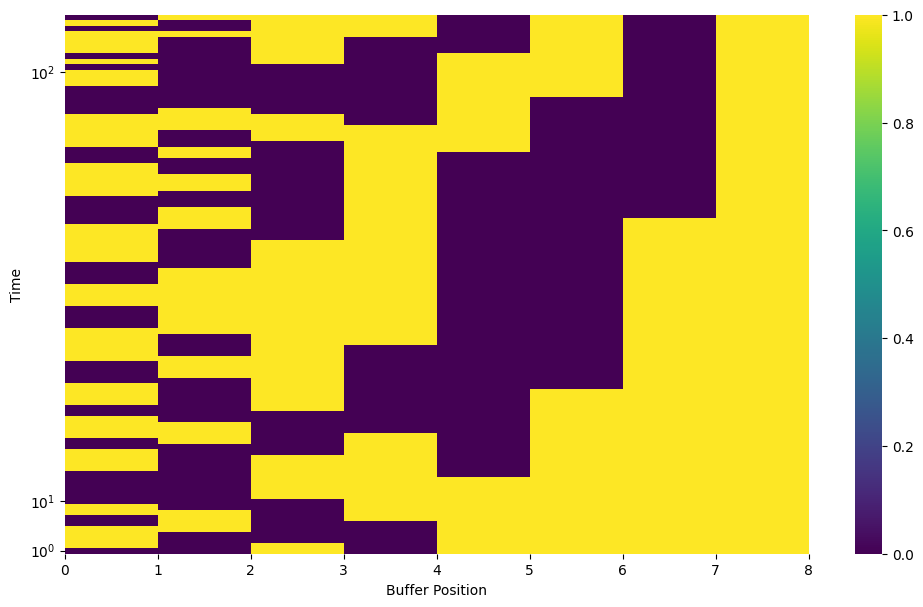

teeplots/00/num-generations=127+surface-size=8+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=127+surface-size=8+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.png


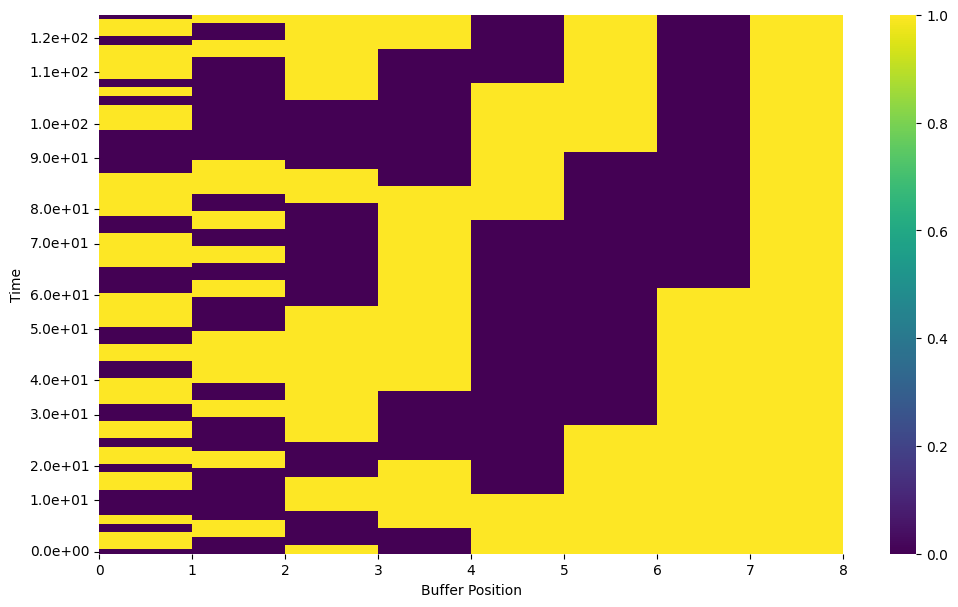

teeplots/00/cnorm=log+num-generations=127+surface-size=8+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=127+surface-size=8+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.png


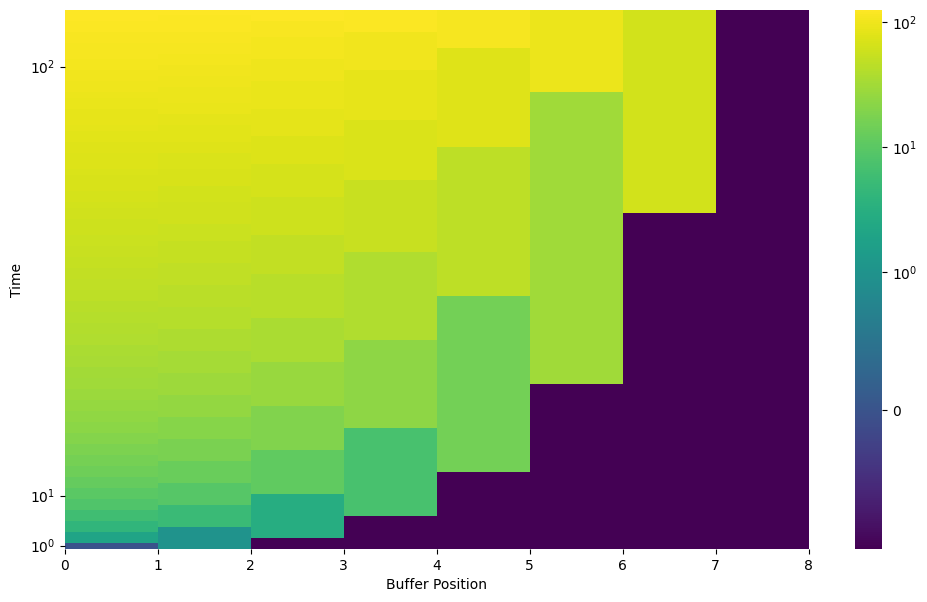

teeplots/00/cnorm=None+num-generations=127+surface-size=8+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=None+num-generations=127+surface-size=8+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.png


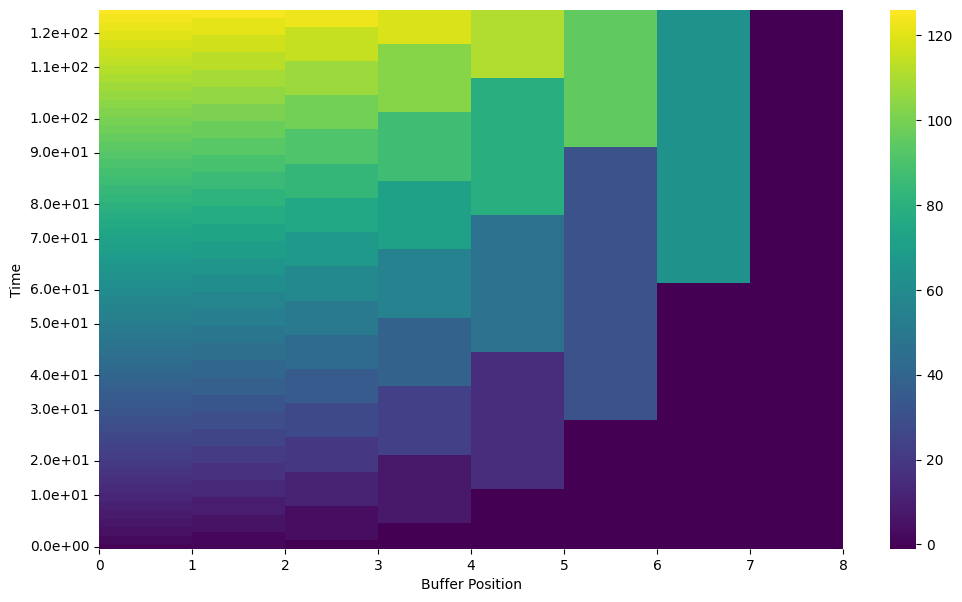

teeplots/00/num-generations=127+surface-size=8+viz=site-hanoi-value-by-rank-heatmap+ext=.pdf
teeplots/00/num-generations=127+surface-size=8+viz=site-hanoi-value-by-rank-heatmap+ext=.png


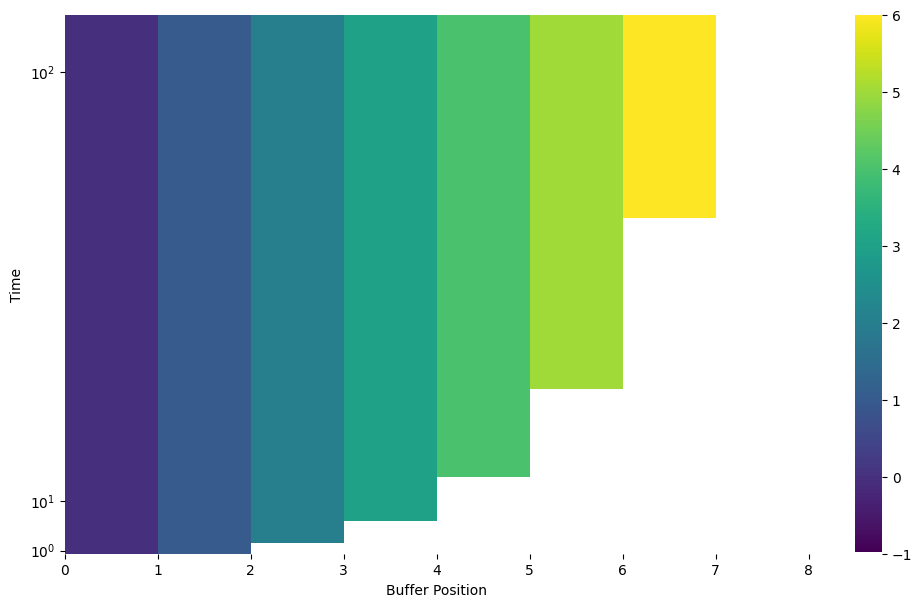

teeplots/00/num-generations=127+surface-size=8+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=127+surface-size=8+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.png


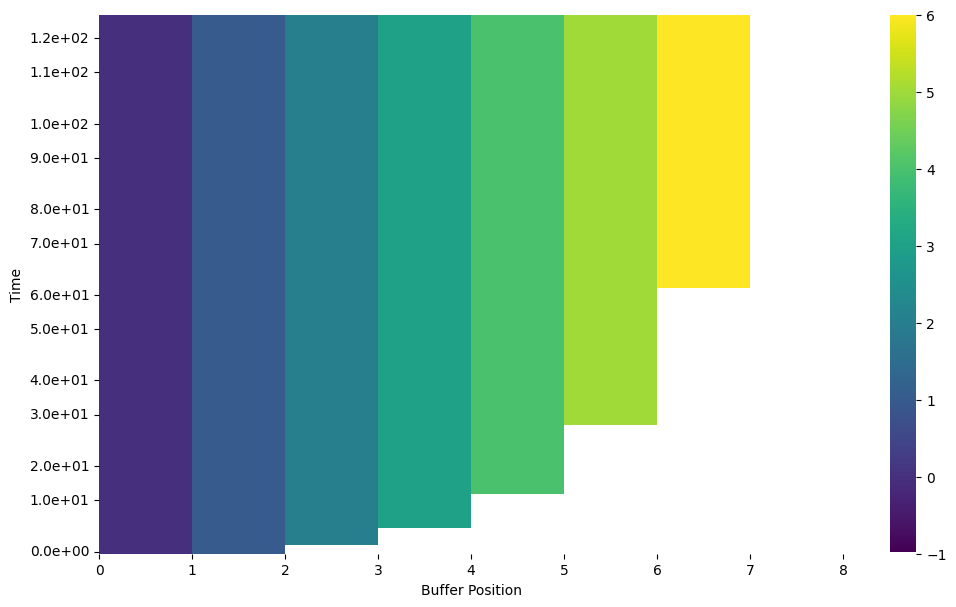

teeplots/00/cnorm=log+num-generations=127+surface-size=8+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=127+surface-size=8+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.png


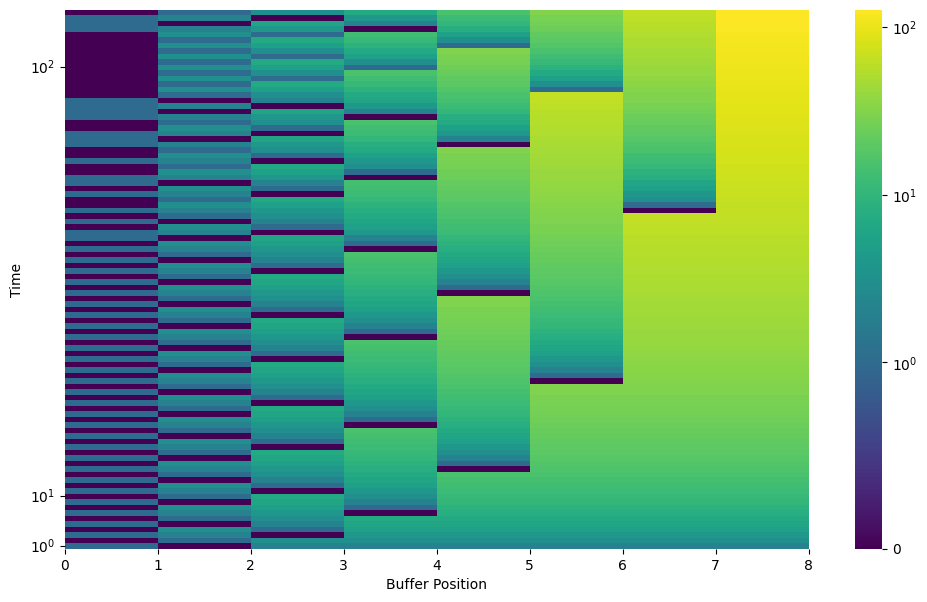

teeplots/00/cnorm=log+num-generations=127+surface-size=8+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=log+num-generations=127+surface-size=8+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.png


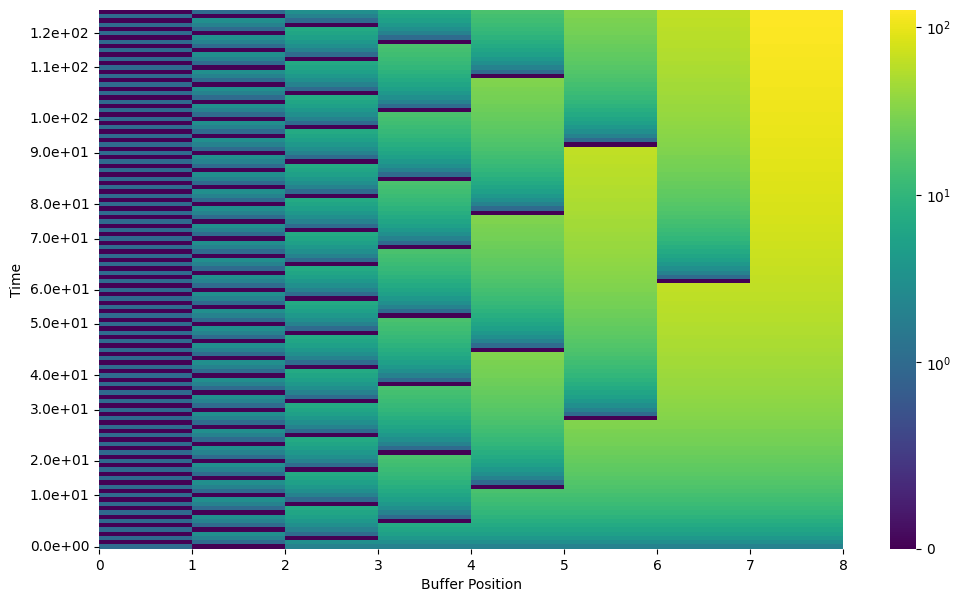

100%|██████████| 125/125 [00:00<00:00, 322.35it/s]


teeplots/00/num-generations=127+surface-size=8+viz=stratum-persistence-dripplot+ext=.pdf
teeplots/00/num-generations=127+surface-size=8+viz=stratum-persistence-dripplot+ext=.png


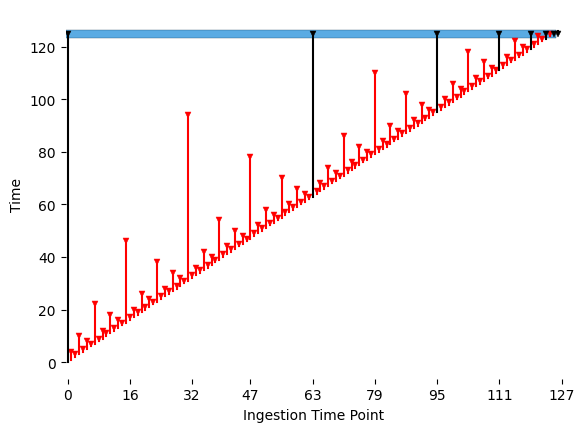

100%|██████████| 262144/262144 [00:03<00:00, 75663.41it/s]


teeplots/00/num-generations=262144+surface-size=32+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/num-generations=262144+surface-size=32+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.png


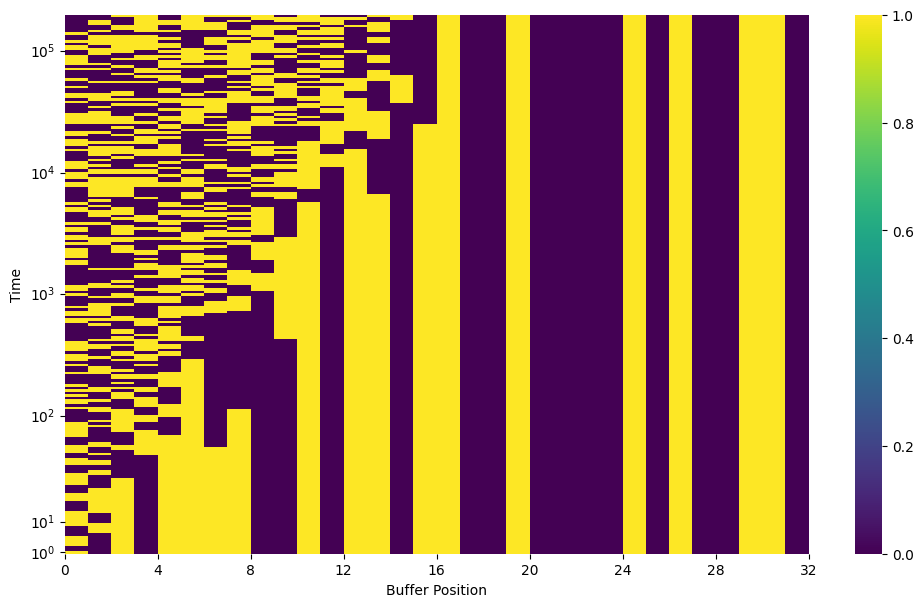

teeplots/00/num-generations=262144+surface-size=32+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=262144+surface-size=32+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.png


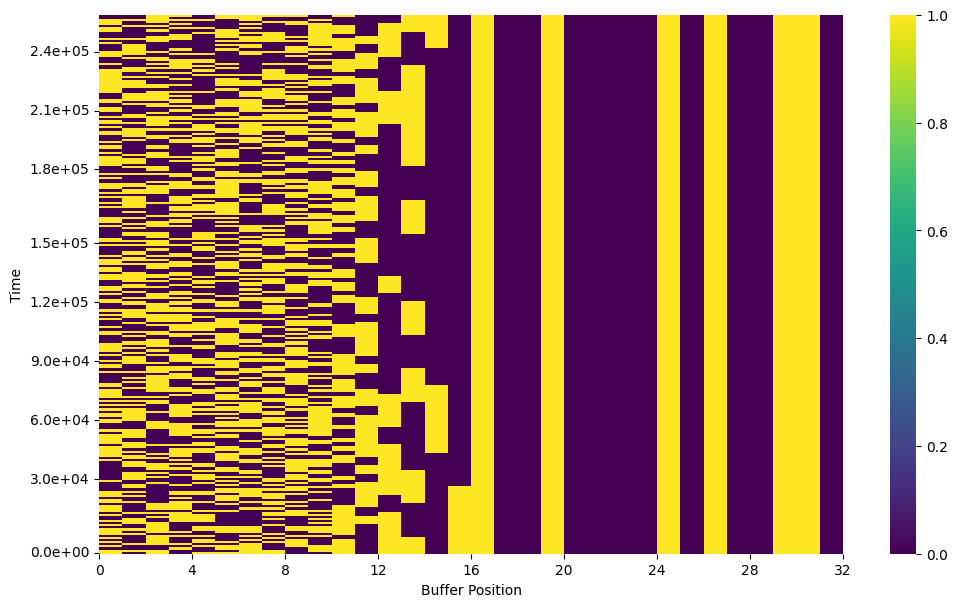

teeplots/00/cnorm=log+num-generations=262144+surface-size=32+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=262144+surface-size=32+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.png


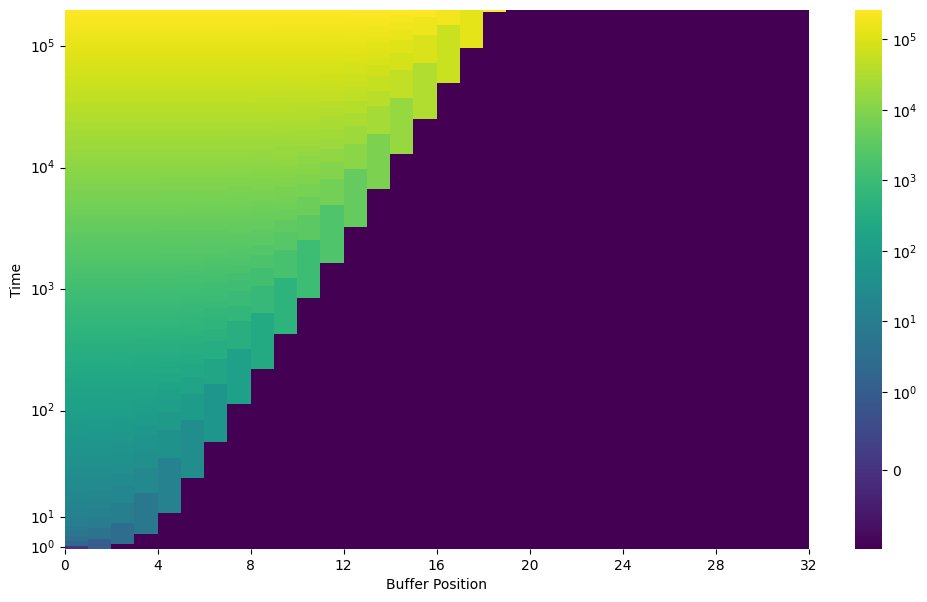

teeplots/00/cnorm=None+num-generations=262144+surface-size=32+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=None+num-generations=262144+surface-size=32+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.png


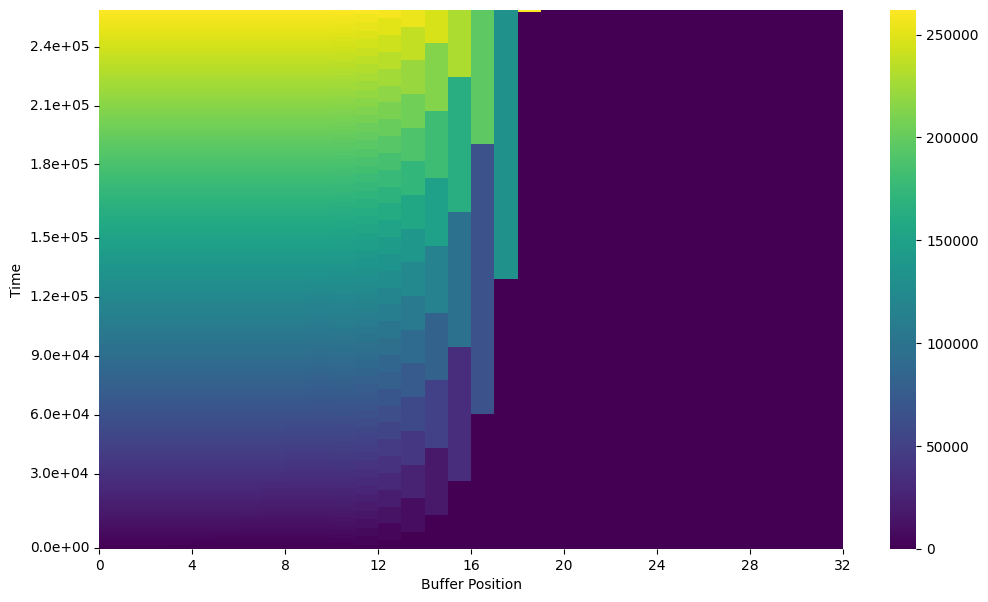

teeplots/00/num-generations=262144+surface-size=32+viz=site-hanoi-value-by-rank-heatmap+ext=.pdf
teeplots/00/num-generations=262144+surface-size=32+viz=site-hanoi-value-by-rank-heatmap+ext=.png


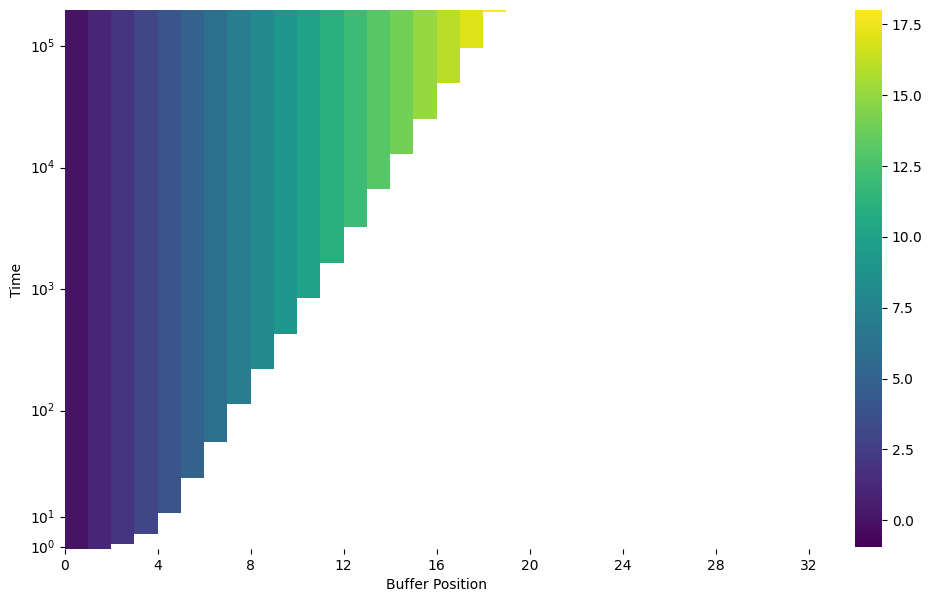

teeplots/00/num-generations=262144+surface-size=32+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=262144+surface-size=32+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.png


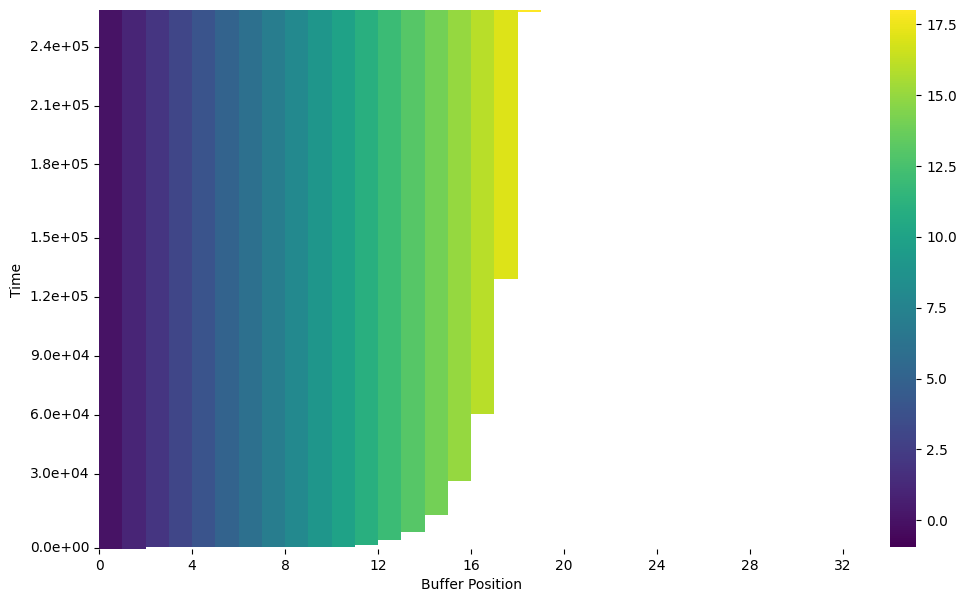

teeplots/00/cnorm=log+num-generations=262144+surface-size=32+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=262144+surface-size=32+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.png


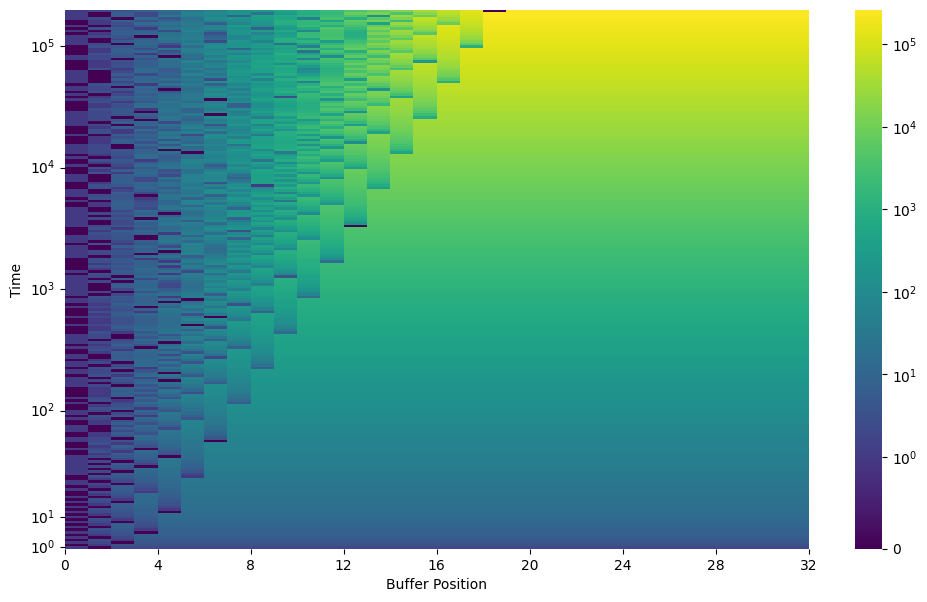

teeplots/00/cnorm=log+num-generations=262144+surface-size=32+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=log+num-generations=262144+surface-size=32+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.png


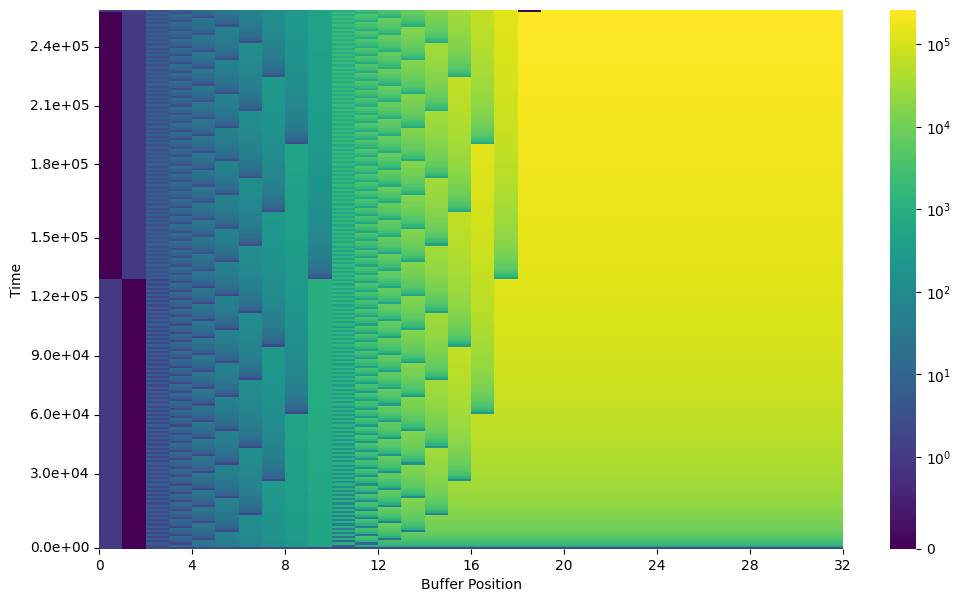

100%|██████████| 2998/2998 [00:08<00:00, 359.31it/s]


teeplots/00/num-generations=262144+surface-size=32+viz=stratum-persistence-dripplot+ext=.pdf
teeplots/00/num-generations=262144+surface-size=32+viz=stratum-persistence-dripplot+ext=.png


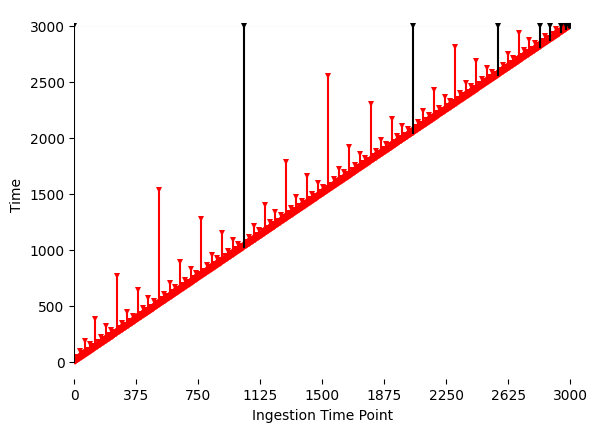

100%|██████████| 4096/4096 [00:00<00:00, 21712.67it/s]


teeplots/00/num-generations=4096+surface-size=128+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/num-generations=4096+surface-size=128+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.png


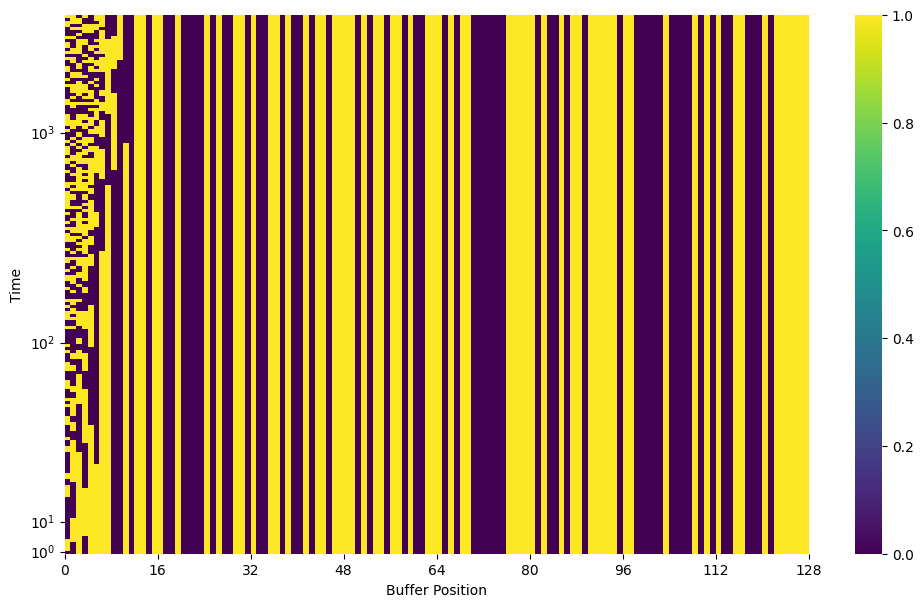

teeplots/00/num-generations=4096+surface-size=128+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=4096+surface-size=128+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.png


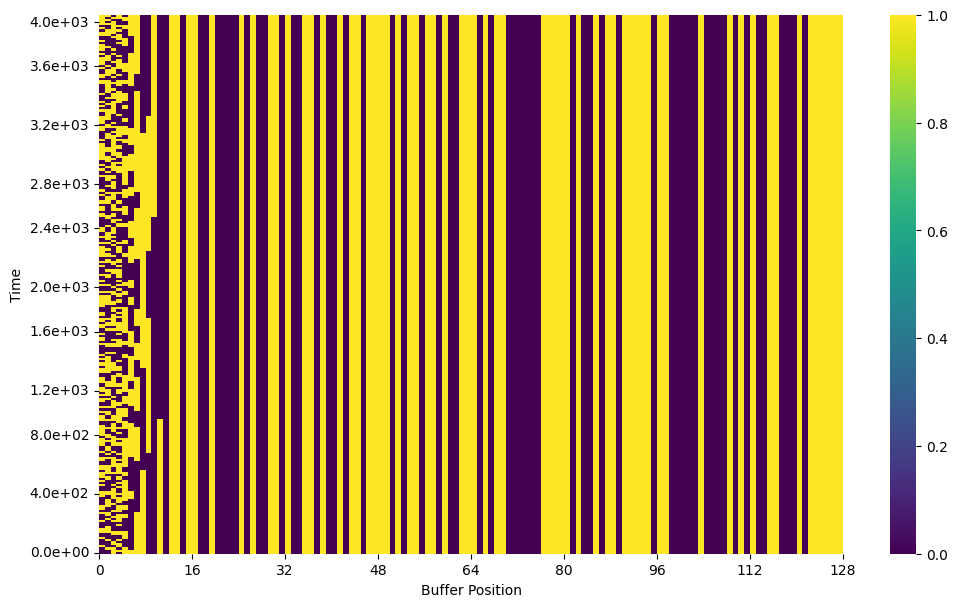

teeplots/00/cnorm=log+num-generations=4096+surface-size=128+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=4096+surface-size=128+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.png


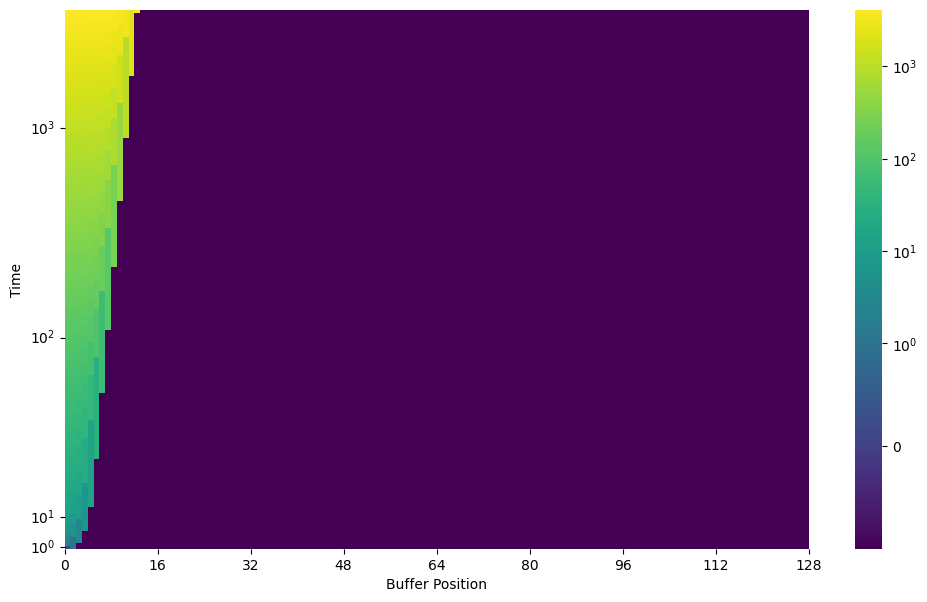

teeplots/00/cnorm=None+num-generations=4096+surface-size=128+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=None+num-generations=4096+surface-size=128+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.png


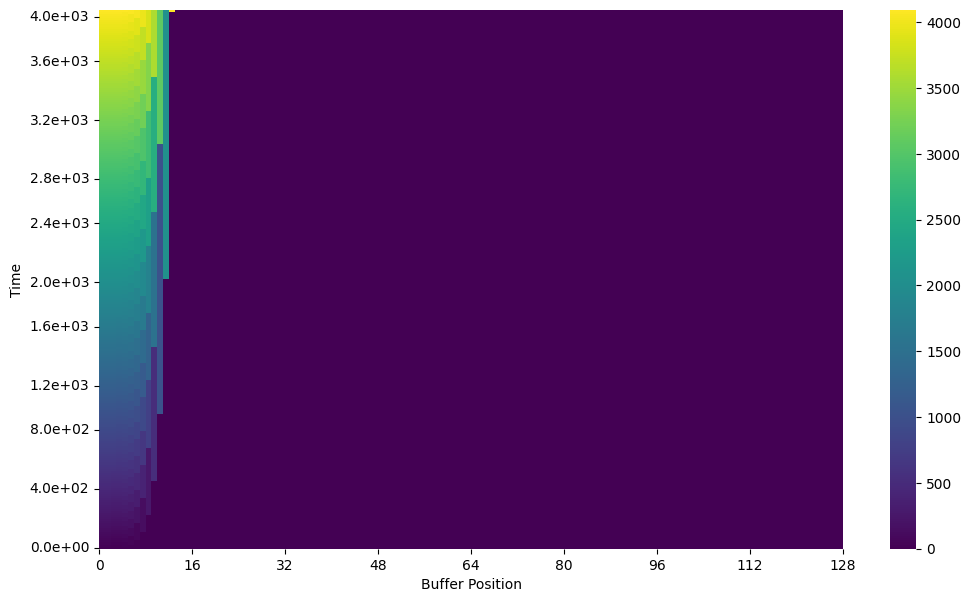

teeplots/00/num-generations=4096+surface-size=128+viz=site-hanoi-value-by-rank-heatmap+ext=.pdf
teeplots/00/num-generations=4096+surface-size=128+viz=site-hanoi-value-by-rank-heatmap+ext=.png


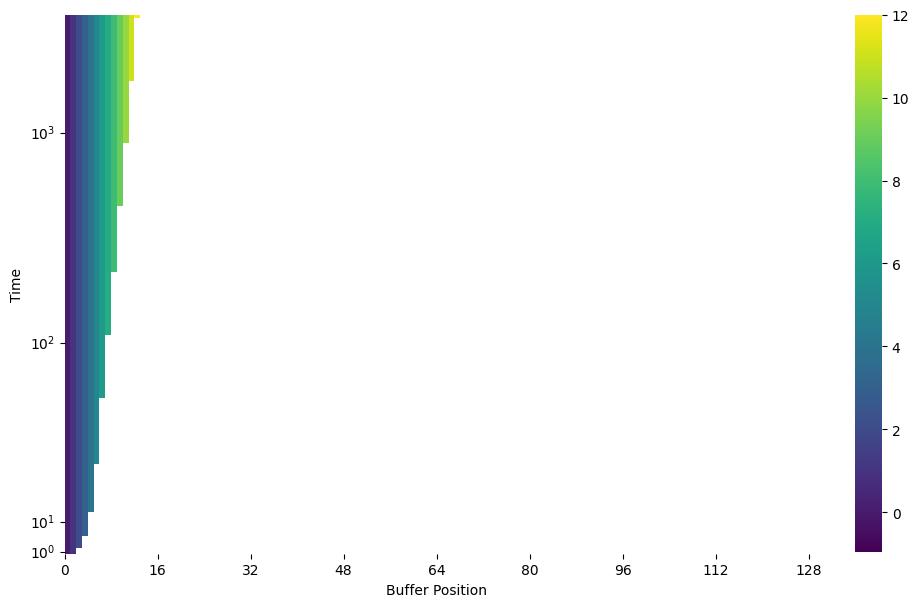

teeplots/00/num-generations=4096+surface-size=128+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=4096+surface-size=128+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.png


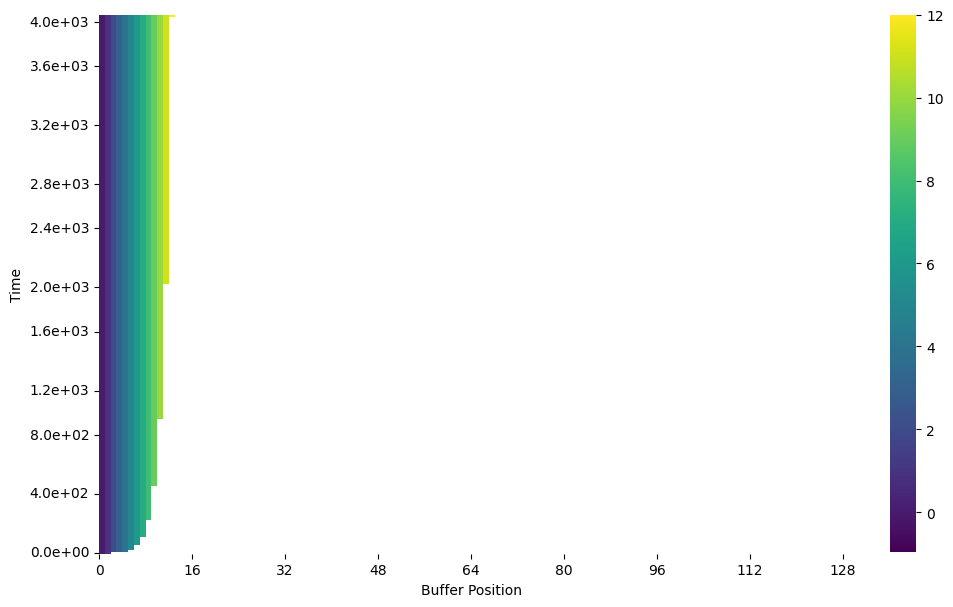

teeplots/00/cnorm=log+num-generations=4096+surface-size=128+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=4096+surface-size=128+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.png


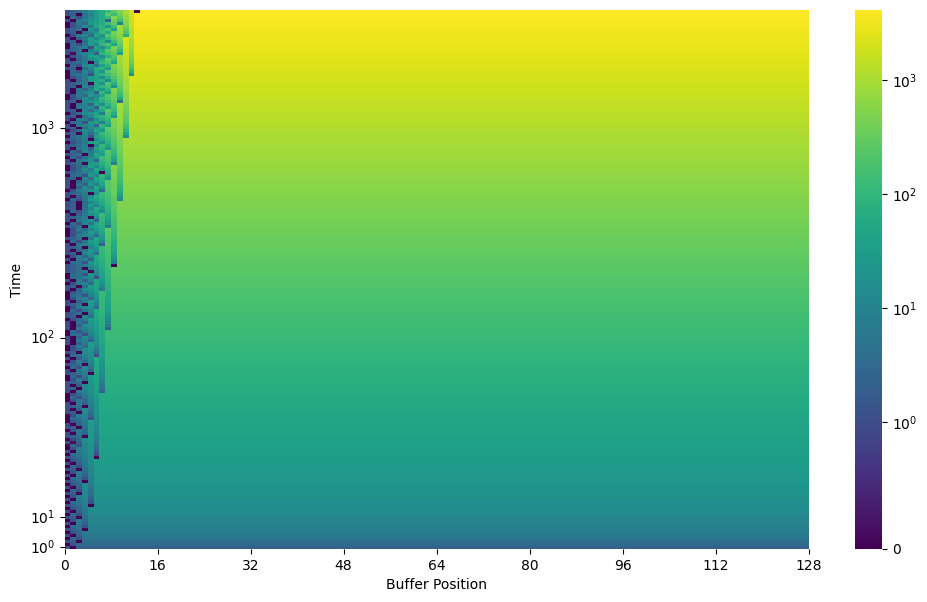

teeplots/00/cnorm=log+num-generations=4096+surface-size=128+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=log+num-generations=4096+surface-size=128+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.png


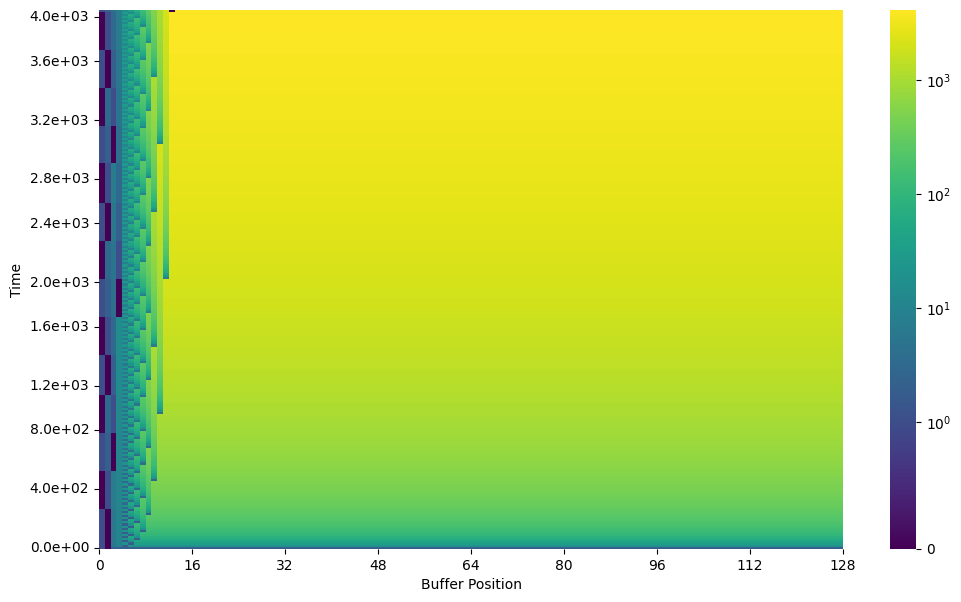

100%|██████████| 2998/2998 [00:09<00:00, 302.92it/s]


teeplots/00/num-generations=4096+surface-size=128+viz=stratum-persistence-dripplot+ext=.pdf
teeplots/00/num-generations=4096+surface-size=128+viz=stratum-persistence-dripplot+ext=.png


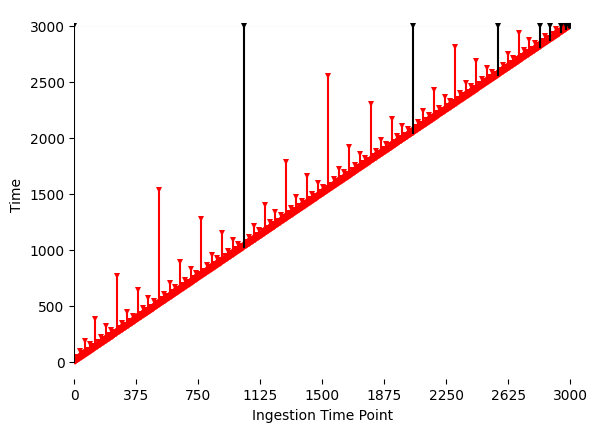

100%|██████████| 4096/4096 [00:00<00:00, 5330.51it/s]


teeplots/00/num-generations=4096+surface-size=512+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/num-generations=4096+surface-size=512+viz=site-differentia-by-rank-heatmap+ynorm=log+ext=.png


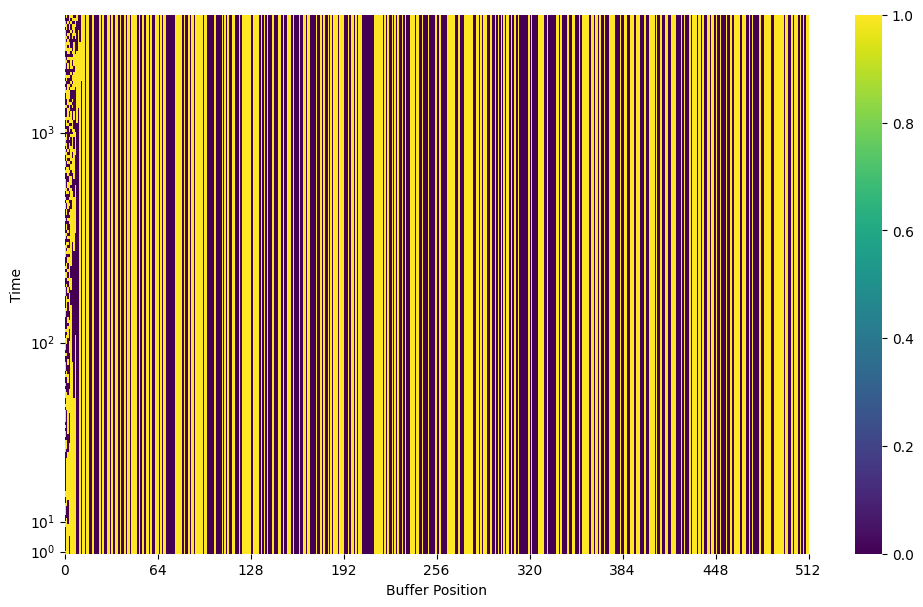

teeplots/00/num-generations=4096+surface-size=512+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=4096+surface-size=512+viz=site-differentia-by-rank-heatmap+ynorm=linear+ext=.png


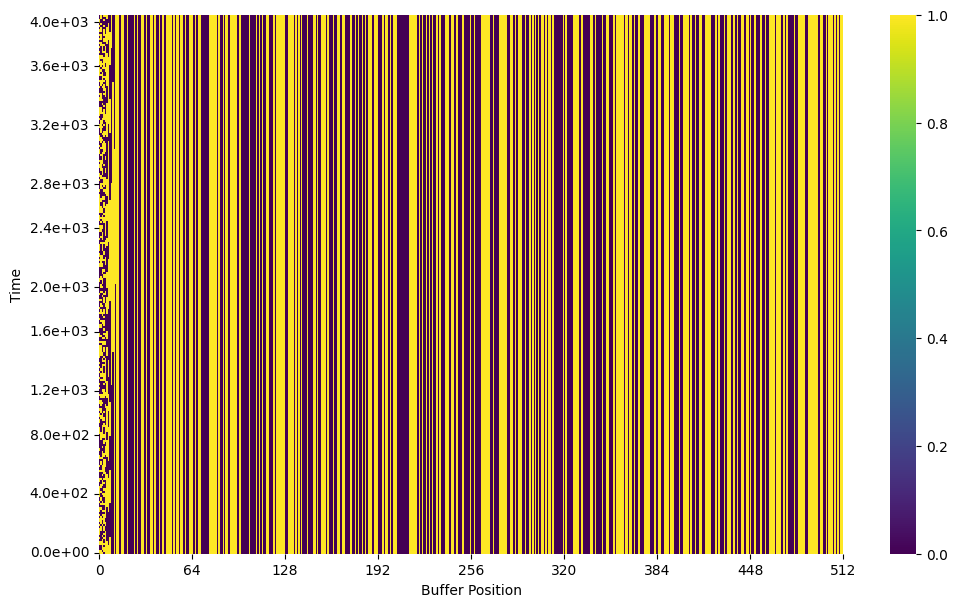

teeplots/00/cnorm=log+num-generations=4096+surface-size=512+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=4096+surface-size=512+viz=site-deposition-rank-by-rank-heatmap+ynorm=log+ext=.png


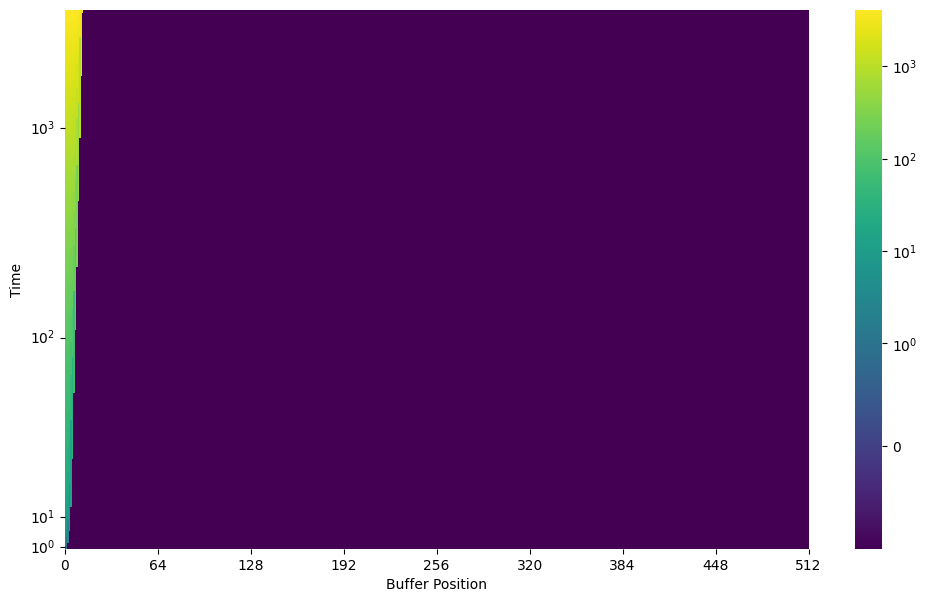

teeplots/00/cnorm=None+num-generations=4096+surface-size=512+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=None+num-generations=4096+surface-size=512+viz=site-deposition-rank-by-rank-heatmap+ynorm=linear+ext=.png


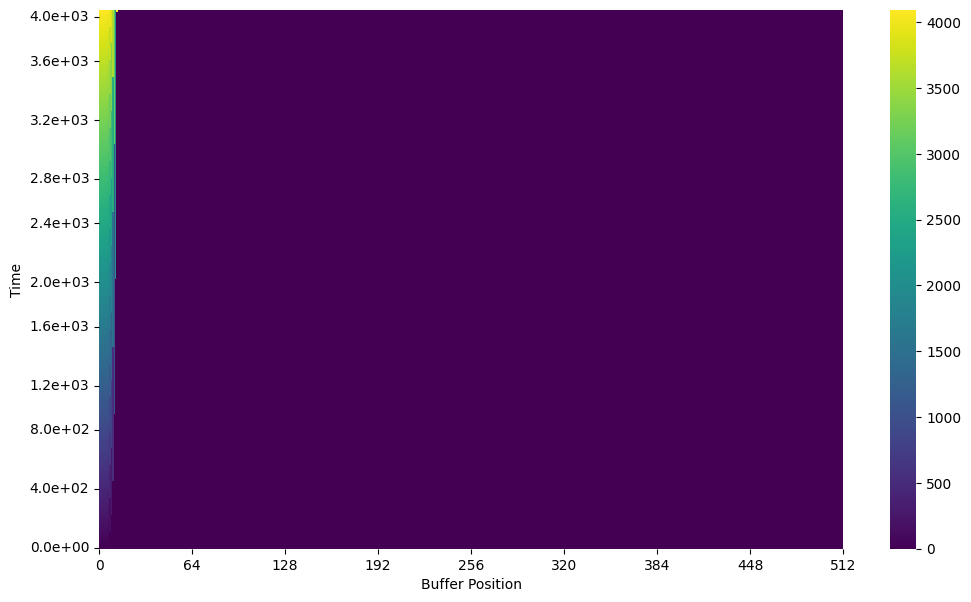

teeplots/00/num-generations=4096+surface-size=512+viz=site-hanoi-value-by-rank-heatmap+ext=.pdf
teeplots/00/num-generations=4096+surface-size=512+viz=site-hanoi-value-by-rank-heatmap+ext=.png


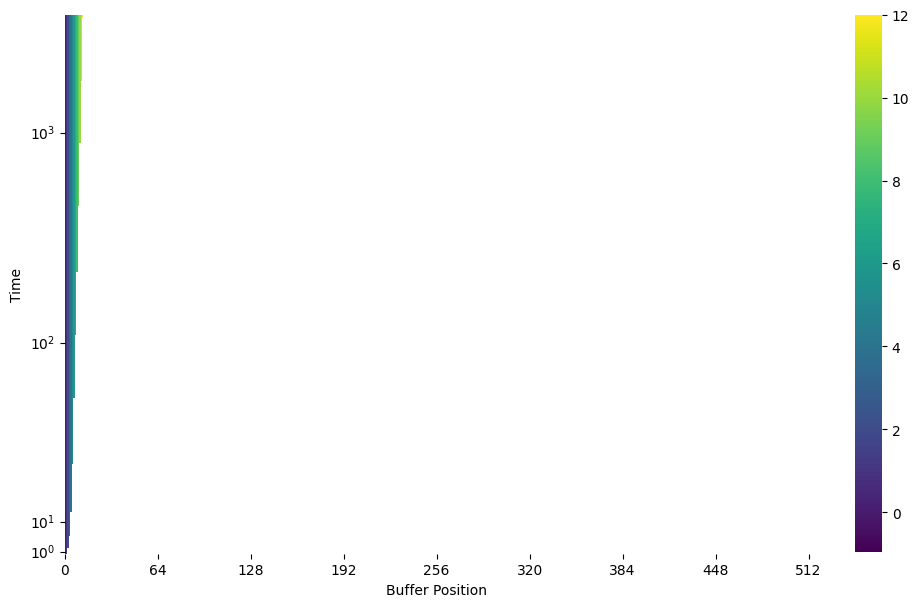

teeplots/00/num-generations=4096+surface-size=512+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/num-generations=4096+surface-size=512+viz=site-hanoi-value-by-rank-heatmap+ynorm=linear+ext=.png


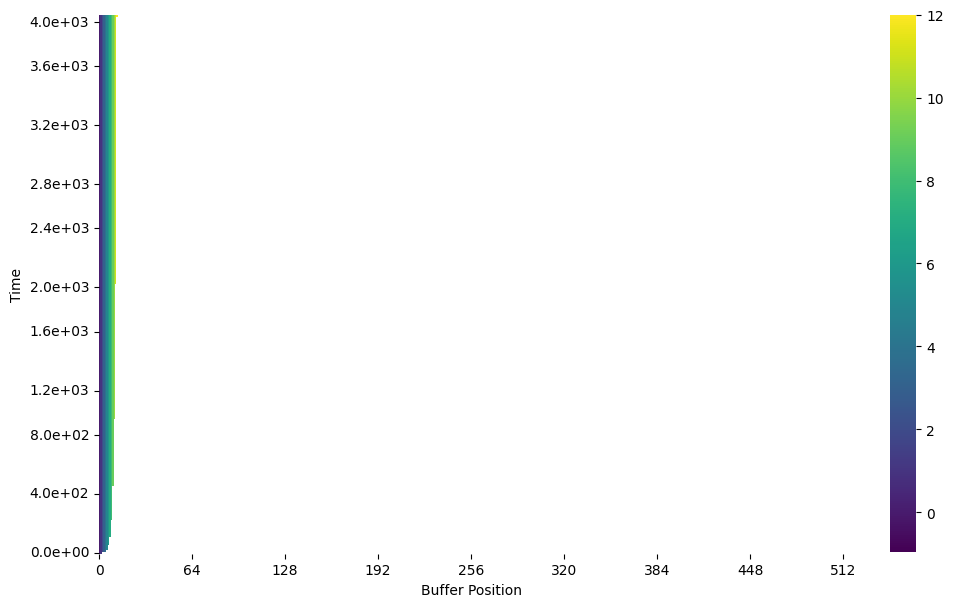

teeplots/00/cnorm=log+num-generations=4096+surface-size=512+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.pdf
teeplots/00/cnorm=log+num-generations=4096+surface-size=512+viz=site-deposition-depth-by-rank-heatmap+ynorm=log+ext=.png


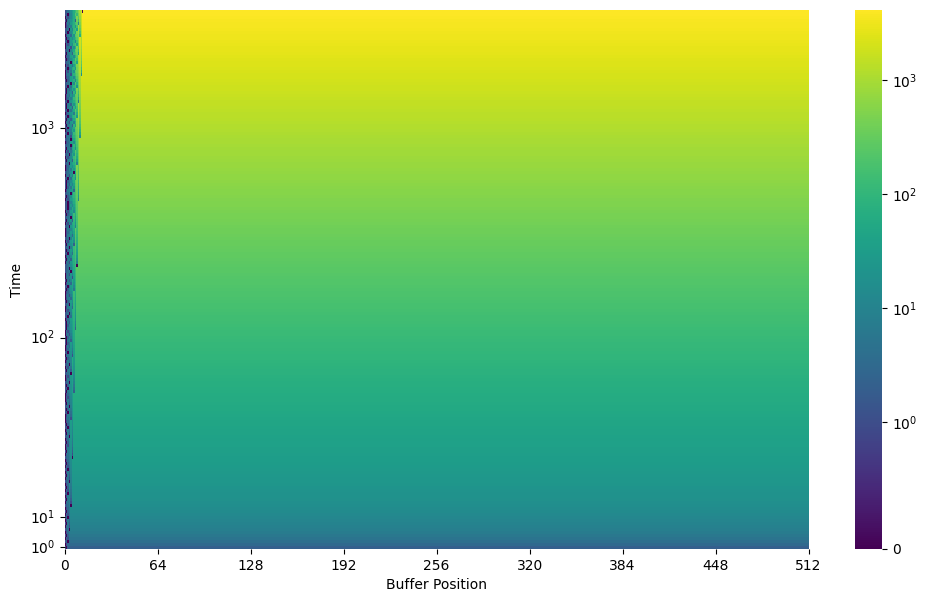

teeplots/00/cnorm=log+num-generations=4096+surface-size=512+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.pdf
teeplots/00/cnorm=log+num-generations=4096+surface-size=512+viz=site-deposition-depth-by-rank-heatmap+ynorm=linear+ext=.png


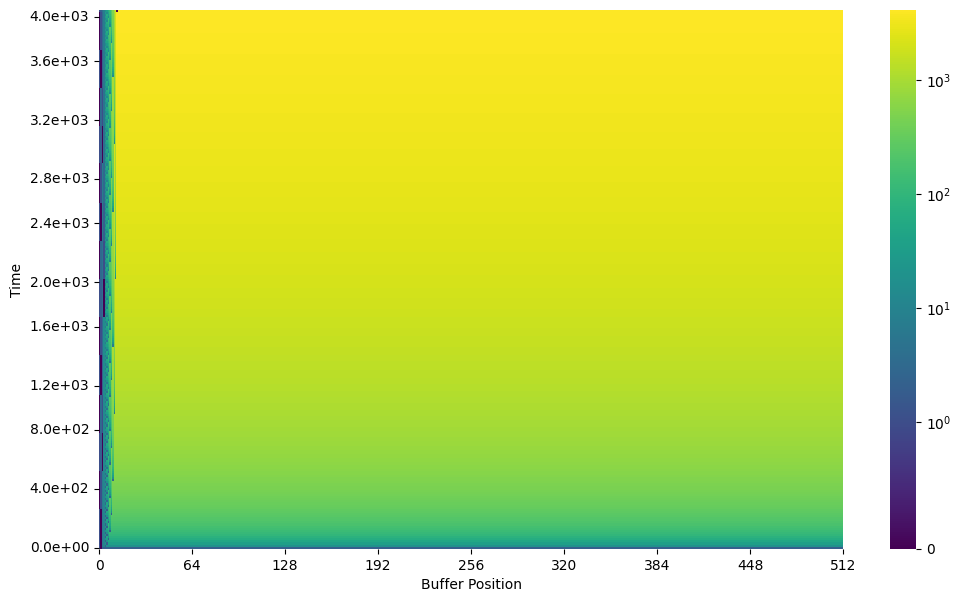

100%|██████████| 2998/2998 [00:14<00:00, 206.44it/s]


teeplots/00/num-generations=4096+surface-size=512+viz=stratum-persistence-dripplot+ext=.pdf
teeplots/00/num-generations=4096+surface-size=512+viz=stratum-persistence-dripplot+ext=.png


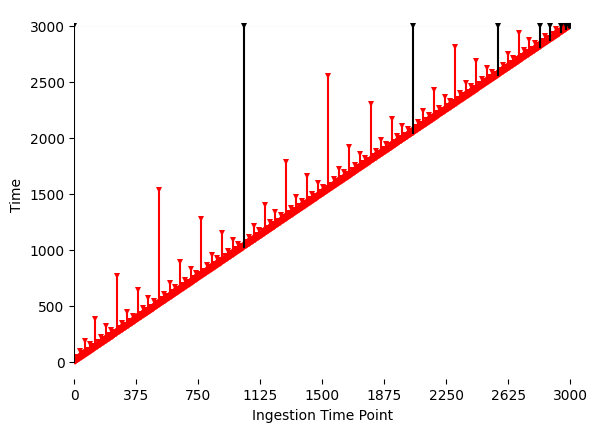

In [11]:
for surface_size_exp in range(3, 10, 2):
    surface_size = 2**surface_size_exp
    display(HTML(f"<h3>surface size {surface_size}</h3>"))

    num_generations = min(
        # don't run out of memory
        2**18 if surface_size_exp < 7 else 2**12,
        get_surface_rank_capacity(surface_size - 1),
    )

    surface_history_df = pylib.site_selection_eval.make_surface_history_df(
        lambda generation, _surf_size: get_deposition_site_at_rank(generation),
        surface_size=surface_size,
        num_generations=num_generations,
        progress_wrap=tqdm,
    )

    # ========================
    kwargs = dict(
        ynorm="log",
    )
    pylib.tee_release(
        pylib.site_selection_viz.site_differentia_by_rank_heatmap,
        surface_history_df,
        **kwargs,
        teeplot_outattrs={
            **{
                "num-generations": num_generations,
                "surface-size": surface_size,
            },
            **kwargs,
        },
        teeplot_subdir="00",
    )

    # ========================
    kwargs = dict(
        ynorm="linear",
    )
    pylib.tee_release(
        pylib.site_selection_viz.site_differentia_by_rank_heatmap,
        surface_history_df,
        **kwargs,
        teeplot_outattrs={
            **{
                "num-generations": num_generations,
                "surface-size": surface_size,
            },
            **kwargs,
        },
        teeplot_subdir="00",
    )

    # ========================
    kwargs = dict(
        cnorm="log",
        ynorm="log",
    )
    pylib.tee_release(
        pylib.site_selection_viz.site_deposition_rank_by_rank_heatmap,
        surface_history_df,
        **kwargs,
        teeplot_outattrs={
            **{
                "num-generations": num_generations,
                "surface-size": surface_size,
            },
            **kwargs,
        },
        teeplot_subdir="00",
    )

    # ========================
    kwargs = dict(
        cnorm=None,
        ynorm="linear",
    )
    pylib.tee_release(
        pylib.site_selection_viz.site_deposition_rank_by_rank_heatmap,
        surface_history_df,
        **kwargs,
        teeplot_outattrs={
            **{
                "num-generations": num_generations,
                "surface-size": surface_size,
            },
            **kwargs,
        },
        teeplot_subdir="00",
    )

    # ========================
    pylib.tee_release(
        pylib.site_selection_viz.site_hanoi_value_by_rank_heatmap,
        surface_history_df,
        teeplot_outattrs={
            "num-generations": num_generations,
            "surface-size": surface_size,
        },
        teeplot_subdir="00",
    )

    # ========================
    kwargs = dict(
        ynorm="linear",
    )
    pylib.tee_release(
        pylib.site_selection_viz.site_hanoi_value_by_rank_heatmap,
        surface_history_df,
        **kwargs,
        teeplot_outattrs={
            **{
                "num-generations": num_generations,
                "surface-size": surface_size,
            },
            **kwargs,
        },
        teeplot_subdir="00",
    )

    # ========================
    kwargs = dict(
        cnorm="log",
        ynorm="log",
    )
    pylib.tee_release(
        pylib.site_selection_viz.site_deposition_depth_by_rank_heatmap,
        surface_history_df,
        **kwargs,
        teeplot_outattrs={
            **{
                "num-generations": num_generations,
                "surface-size": surface_size,
            },
            **kwargs,
        },
        teeplot_subdir="00",
    )

    # ========================
    kwargs = dict(
        cnorm="log",
        ynorm="linear",
    )
    pylib.tee_release(
        pylib.site_selection_viz.site_deposition_depth_by_rank_heatmap,
        surface_history_df,
        **kwargs,
        teeplot_outattrs={
            **{
                "num-generations": num_generations,
                "surface-size": surface_size,
            },
            **kwargs,
        },
        teeplot_subdir="00",
    )

    # ========================
    pylib.tee_release(
        pylib.site_selection_viz.stratum_persistence_dripplot,
        surface_history_df[surface_history_df["rank"] < 3000],
        teeplot_outattrs={
            "num-generations": num_generations,
            "surface-size": surface_size,
        },
        progress_wrap=tqdm,
        teeplot_subdir="00",
    )
